# Preprocessing data and visualisation

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import datasets

In [2]:
# The code was removed by Watson Studio for sharing.

,Runs,Ip,Ton,Tau,V,MRR,Ra
0,1,10,75,66.5,45,9.04,5.98
1,2,5,50,50.0,50,5.18,5.01
2,3,5,100,83.0,40,5.25,5.03
3,4,5,50,83.0,40,8.87,4.71
4,5,15,100,50.0,50,51.09,8.10


In [3]:
data.drop(['Runs'],axis=1,inplace=True)

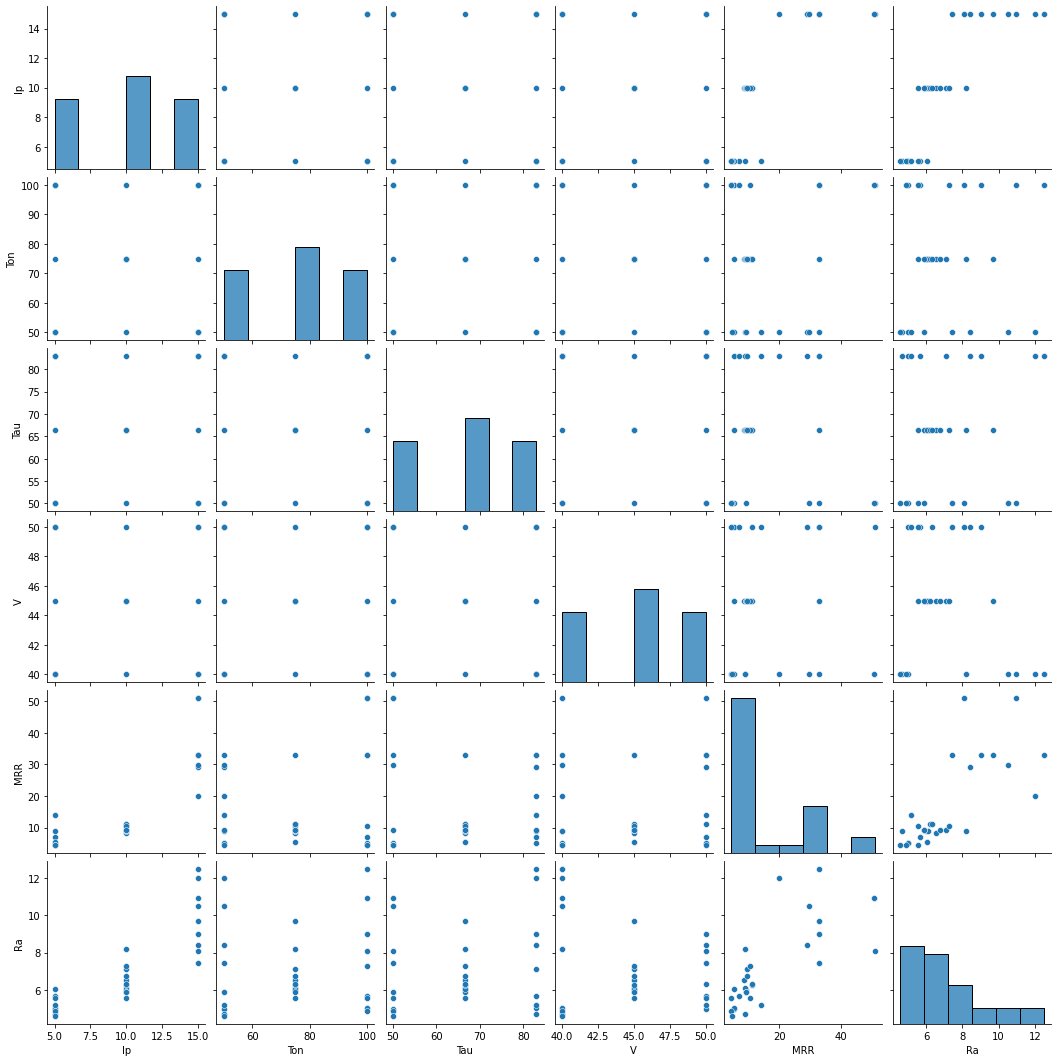

In [4]:

import seaborn as sns
sns.pairplot(data)

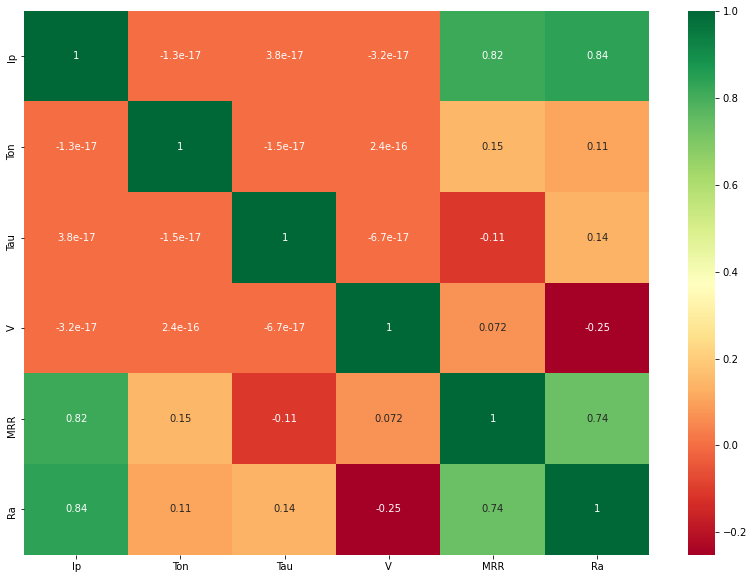

In [5]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [6]:
from sklearn import preprocessing

X= np.asarray(data[['Ip','Ton','Tau','V']])
scalerx=preprocessing.StandardScaler().fit(X)
X = scalerx.transform(X)
Y=np.asarray(data[['MRR']])
scalery=preprocessing.StandardScaler().fit(Y)
Y = scalery.transform(Y)
Y=Y.flatten()

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=1)


# RBF using Gaussian process regressor

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

gpc = GaussianProcessRegressor(kernel=RBF(length_scale=12.0, length_scale_bounds=(4, 5)), optimizer='fmin_l_bfgs_b', n_restarts_optimizer=1 ,random_state=2).fit(x_train,y_train)
gpc.score(x_test,y_test)

#gpc.score(x_train,y_train)

0.6575024068098446

# Random Forest

In [9]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 300, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 30, num = 15)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [1, 22, 43, 65, 86, 107, 129, 150, 171, 193, 214, 235, 257, 278, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30], 'min_samples_split': [2, 5, 10, 15, 30], 'min_samples_leaf': [1, 2, 5, 10]}


In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='r2', n_iter = 10, cv = 3, verbose=2, random_state=7, n_jobs = 1)
rf_random.fit(x_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=257, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=257, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=257, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=257, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=257, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=1 
[CV]  n_estimators=257, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=300, min_samples_split=30, min_samples_leaf=10, max_features=auto, max_depth=19 
[CV]  n_estimators=300, min_samples_split=30, min_samples_leaf=10, max_features=auto, max_depth=19, total=   0.3s
[CV] n_estimators=300, min_samples_split=30, min_samples_leaf=10, max_features=auto, max_depth=19 
[CV]  n_estimators=300, min_samples_split=30, min_samples_leaf=10, max_features=auto, max_depth=19, total=   0.3s
[CV] n_estimators=300, min_samples_split=30, min_samples_leaf=10, max_features=auto, max_depth=19 
[CV]  n_estimators=300, min_samples_split=30, min_samples_leaf=10, max_features=auto, max_depth=19, total=   0.3s
[CV] n_estimators=43, min_samples_split=

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.2s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 30],
                                        'n_estimators': [1, 22, 43, 65, 86, 107,
                                                         129, 150, 171, 193,
                                                         214, 235, 257, 278,
                                                         300]},
                   random_state=7, scoring='r2', verbose=2)

In [11]:
rf_random.best_score_


0.7199807817946798

# Polynomial regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(x_train)
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, y_train)

test_x_poly = poly.fit_transform(x_test)
test_y_ = clf.predict(test_x_poly)

r2_score(y_test,test_y_ ) 




0.9297622001416106

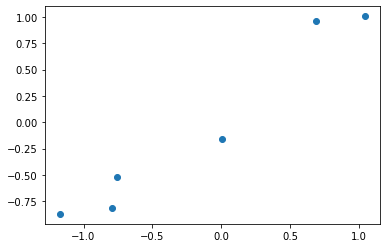

In [13]:
plt.scatter(test_y_,y_test)

In [14]:
pip install anvil-uplink

     |████████████████████████████████| 62 kB 2.6 MB/s  eta 0:00:01
     |████████████████████████████████| 51 kB 482 kB/s  eta 0:00:01
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45215 sha256=7041e27142f5e775d68804bff721b9c4314c17a2230198bd03b3b9d1578e6ea9
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/ea/f9/a1/34e2943cce3cf7daca304bfc35e91280694ced9194a487ce2f
Successfully built ws4py
Note: you may need to restart the kernel to use updated packages.


In [15]:
import anvil.server

anvil.server.connect("VU2RPAILUYXT5HLMJMQBYN5I-N2YS5ILRZFAJCVUY")

@anvil.server.callable
def MRR(ip,ton,tau,v):
    pred= [[ip,ton,tau,v]]
    predx = poly.fit_transform(pred)
    predictedmrr=clf.predict(predx).item(0)
    if(predictedmrr>0):
        return predictedmrr
    else: 
        return "Oops! you can't do that"
  

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER
